In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from networkx.algorithms import community as cm

import scipy.cluster.hierarchy as hier

### Agrupamento hierárquico

No agrupamento hierárquico a idéia é iniciar com os nós isolados, cada um formando uma comunidade unitária, e a cada etapa ir juntando os nós aos grupos de acordo com alguma medida de similaridade de pares de nós.

Algumas medidas podem ser usadas para quantificar a similaridade entre nós. 
No método CONCOR, usamos a correlação de Pearson entre as linhas da matriz de adjacência correspondente a dois nós, como uma medida de similaridade entre eles. 

Outras possibilidades são usar o recíproco da distância Euclideana entre as linhas da matriz, ou o número de nós na rede menos o número de vizinhos que está na vizinhança de apenas um dos nós em cada par.

**Exemplo**

Considere o exemplo dos personagens do segundo livro da saga de Harry Potter.

In [32]:
atri = pd.read_csv('../data/harrypotter/hpattributes.txt', sep='\t')
ares = pd.read_csv('../data/harrypotter/hpbook2.txt', sep=' ', header=None)
nome = pd.read_csv('../data/harrypotter/hpnames.txt', sep='\t')

In [33]:
# criando a rede

gpotter = nx.DiGraph()

n = atri.shape[0]

for k in range(n):
    gpotter.add_node(k,
                     nome = nome['name'][k],
                     ano = atri['schoolyear'][k],
                     gen = atri['gender'][k],
                     casa = atri['house'][k])

for k in range(n):
    for m in range(n):
        if ares.values[k][m] == 1:
            gpotter.add_edge(k,m)

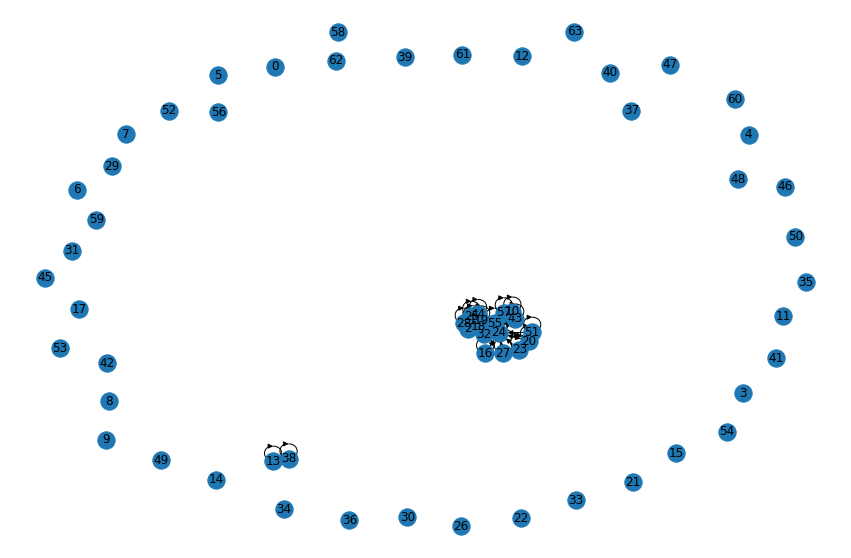

In [34]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw(gpotter,with_labels=True)

In [35]:
# matriz de adjacencia esparsa
A = nx.adjacency_matrix(gpotter)

# apagando os nos isolados
isolados = []
for k in range(n):
    if np.sum(A[[k],:]) == 0:
        isolados.append(k)
        gpotter.remove_node(k)

print(len(isolados), 'nos isolados.')

44 nos isolados.


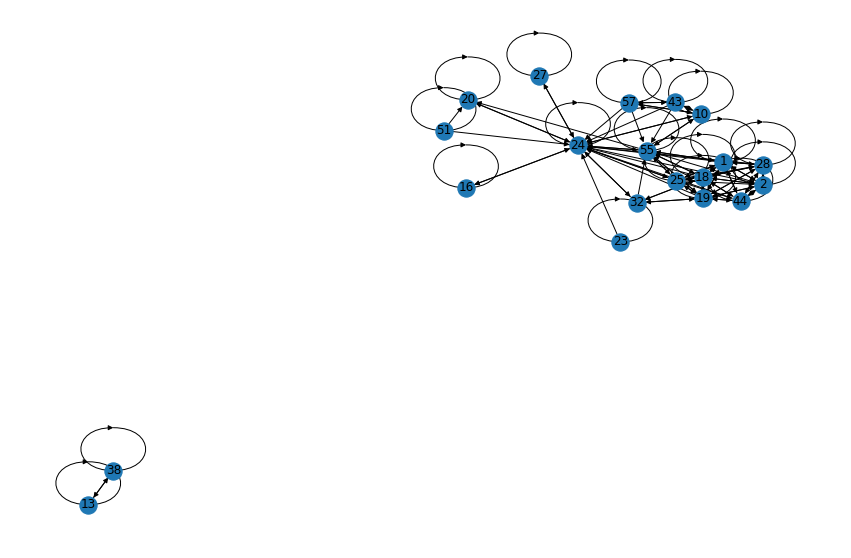

In [36]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw(gpotter,with_labels=True)

O **networkx** não tem funções para fazer um agrupamento hierárquico de vértices. 

O pacote **SciPy** tem um sub-pacote, chamado **clustering.hierachical**. 
Entre as funções deste pacote, encontramos **linkage** que constrói agrupamentos hierárquicos usando diversos critérios. 

Alguns desses critérios são:

- **complete linkage**: a similaridade entre dois grupos é medida como a mínima similaridade entre cada par de vértices.

- **single linkage**: a similaridade entre dois grupos é medida como a máxima similaridade entre cada par de vértices.

- **average linkage**: a similaridade entre dois grupos é medida como a média das similaridades entre cada par de vértices.

O algoritmo começa adjuntando os dois vértices que têm a maior similaridade. 
Depois, o algoritmo continua adjuntando dois grupos que têm a maior similaridade, de acordo com o tipo de ligação usada.

In [37]:
# matriz de adjacencia esparsa
A = nx.adjacency_matrix(gpotter)

# matriz de adjacencia densa
A = np.array(A.todense(), dtype = float)

S = np.copy(A.T)

In [38]:
# agrupamento
Z = hier.linkage(S, 'complete', metric='euclidean')

In [39]:
# etiquetas
nomes = [gpotter.nodes[n]['nome'] for n in gpotter.nodes]

**set_link_color_palette()**

Set list of matplotlib color codes for use by dendrogram.

In [40]:
# cores das linhas do grafico
hier.set_link_color_palette(['b'])

**hier.dendrogram()**

Plot the hierarchical clustering as a dendrogram.

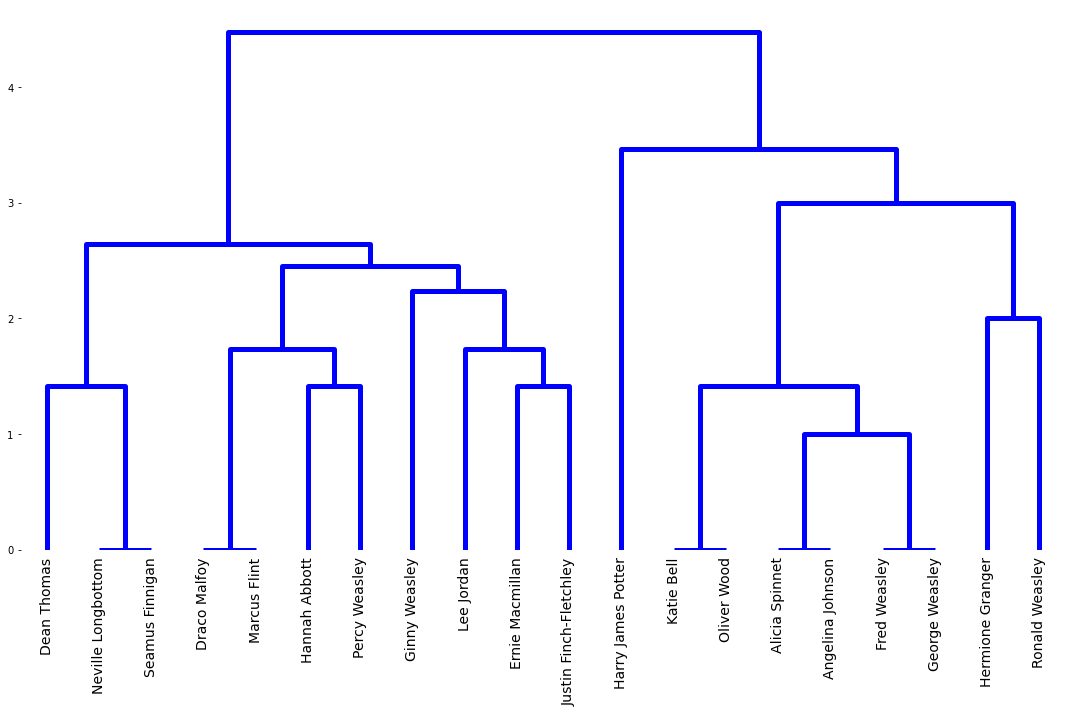

In [41]:
#  Dendrograma de agrupamento hierárquico baseado, aplicado a uma rede de personagens do segundo livro da saga Harry Potter

fig, ax = plt.subplots(1, 1, figsize = (15,10))

with plt.rc_context({'lines.linewidth': 5}):
    dn = hier.dendrogram(Z, 
                         color_threshold = np.inf,
                         leaf_rotation = 'vertical', 
                         leaf_font_size = 14, 
                         labels = nomes )
    
plt.tight_layout()
plt.box(False)
plt.show()